In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rolling import slice_wfd_area
from lsst.sims.featureScheduler.utils import standard_goals, calc_norm_factor, empty_observation
import lsst.sims.featureScheduler as fs
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler.utils import standard_goals, calc_norm_factor
import lsst.sims.featureScheduler.basis_functions as bf
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys, Greedy_survey,
                                                Blob_survey)

In [2]:
nside=32
observatory = Model_observatory(nside=nside)
conditions = observatory.return_conditions()

/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:377: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:476: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


In [3]:
sun_ra_0 = conditions.sunRA  # radians
offset = fs.utils.create_season_offset(nside, sun_ra_0)
max_season = 6

sg = standard_goals()
norm_factor = calc_norm_factor(sg)

mod_year = 2

roll_maps = slice_wfd_area(mod_year, sg)
target_maps = roll_maps + [sg]


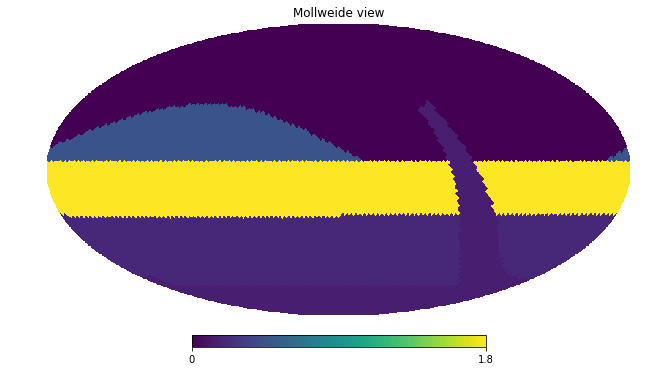

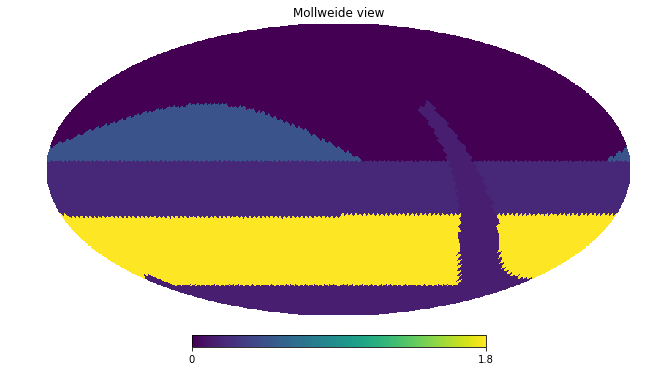

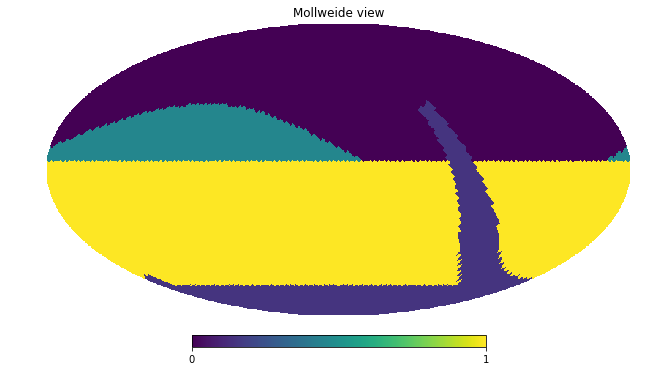

In [4]:
# The three target maps used. 
for i in range(3):
    hp.mollview(target_maps[i]['r'])


In [5]:
filtername = 'r'
target_list = [tm[filtername] for tm in target_maps]

# Define a basis function that will scroll maps on and off
basis = bf.Target_map_modulo_basis_function(filtername=filtername,
                                    target_maps=target_list,
                                    season_modulo=mod_year, day_offset=offset,
                                    out_of_bounds_val=np.nan, nside=nside,
                                    norm_factor=norm_factor,
                                    max_season=max_season)

# Need to give it one observation to see some contrast
token_pix = np.where(target_maps[-1]['r'] == 1)[0]
nights = np.arange(0,356.25*6, 30*3)
for night in nights:
    obs = empty_observation()
    obs['night'] = night
    basis.add_observation(obs, indx=[token_pix.min(), token_pix.max()])

for feat in basis.survey_features:
    basis.survey_features[feat].feature = basis.survey_features[feat].feature/np.max(basis.survey_features[feat].feature)

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0
/Users/

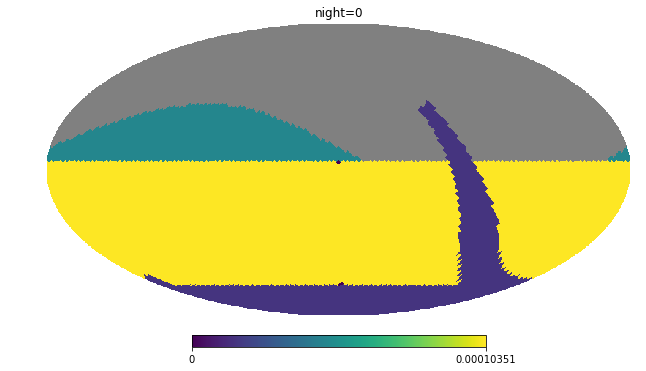

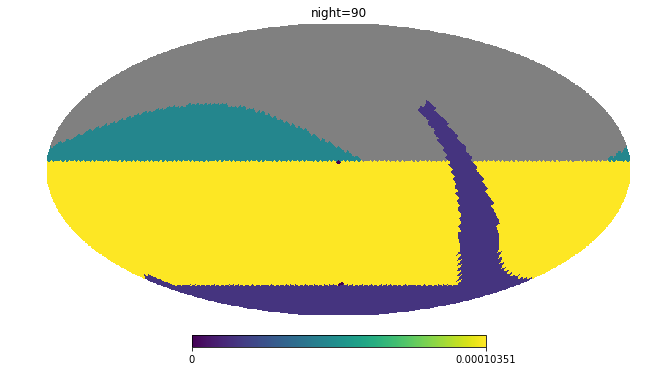

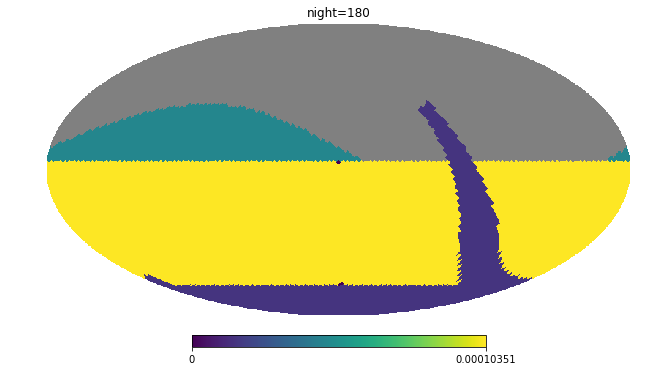

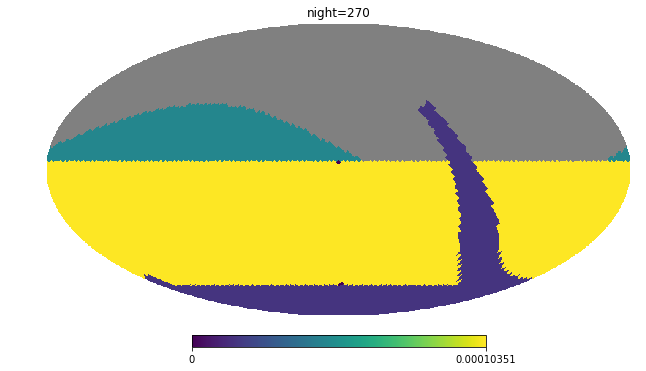

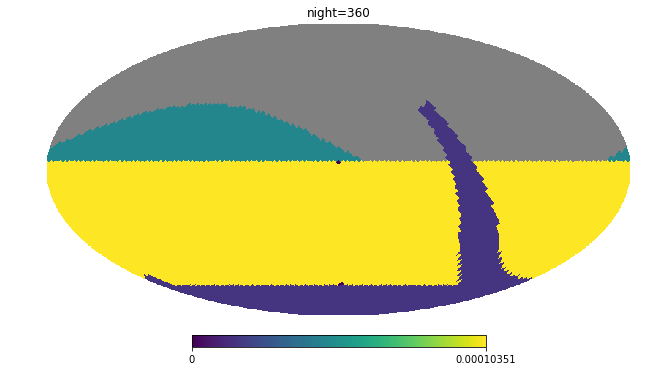

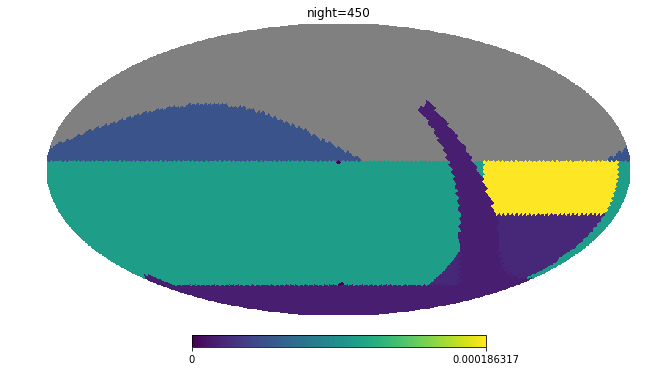

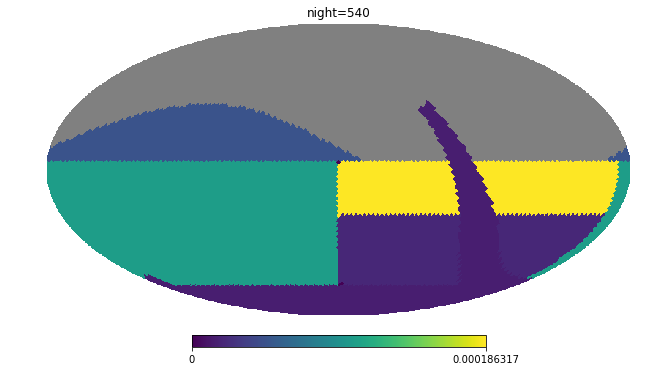

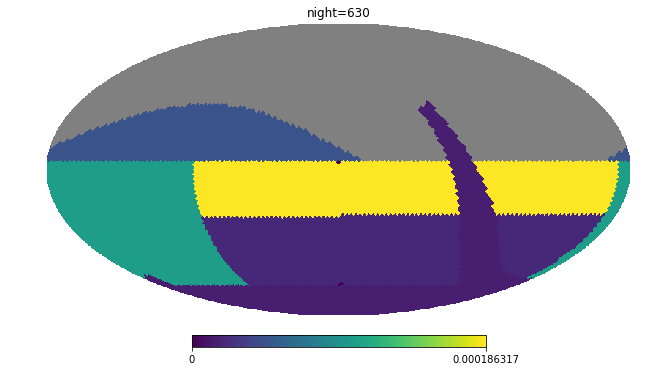

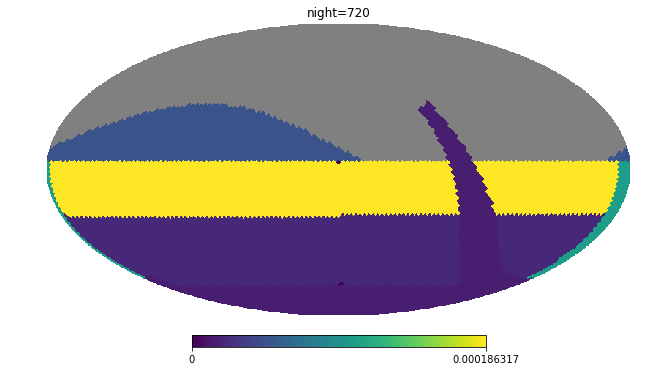

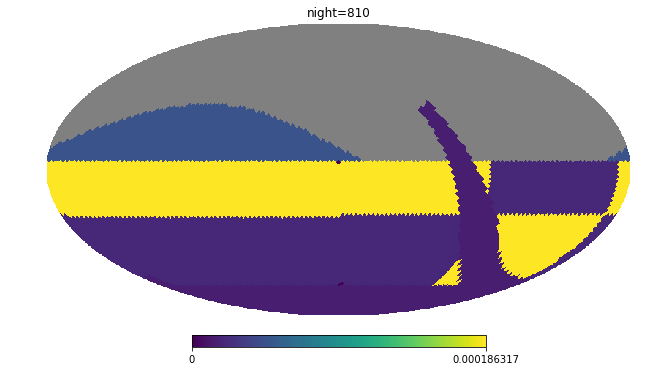

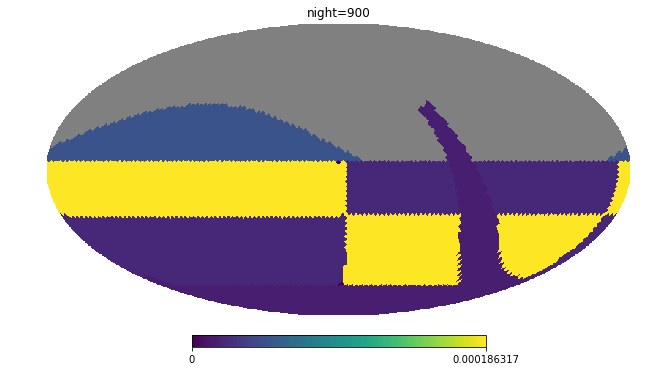

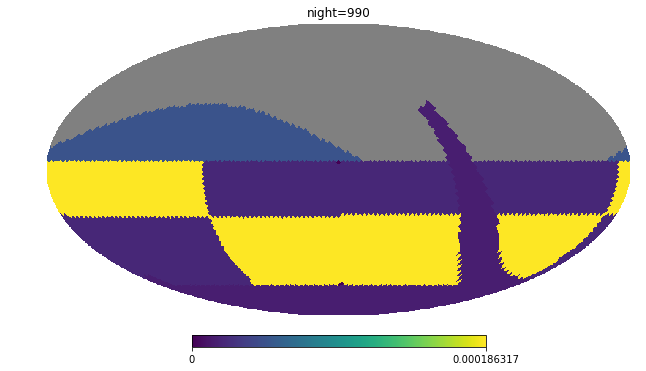

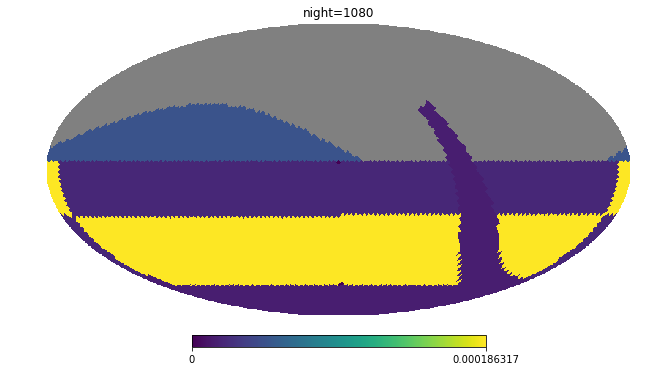

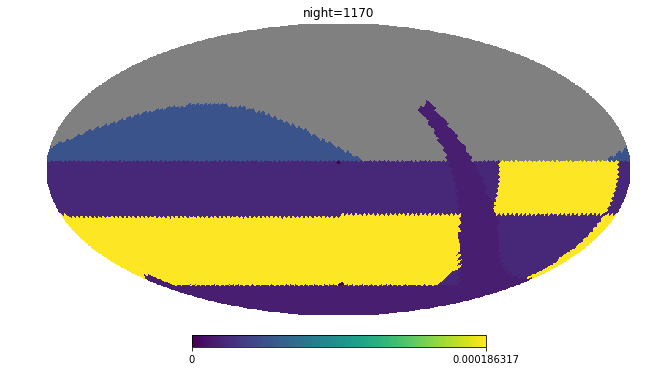

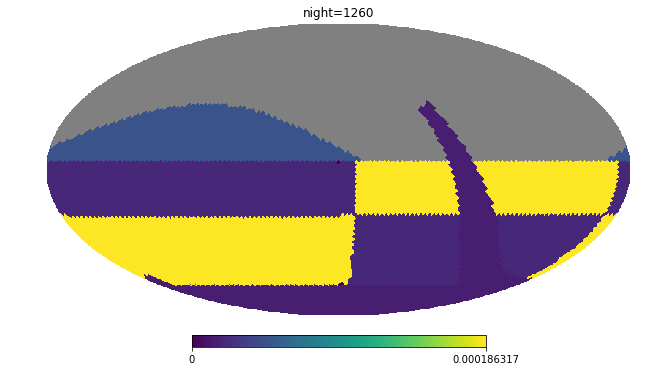

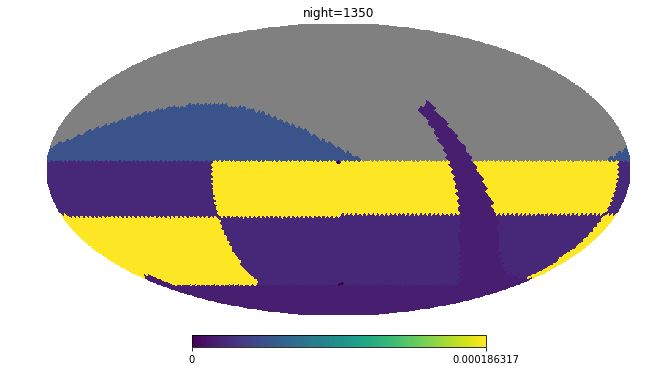

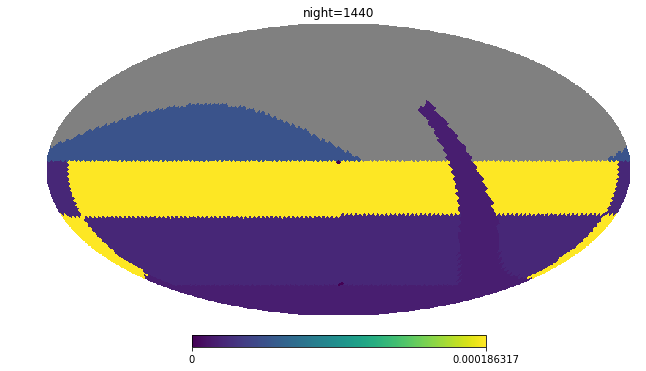

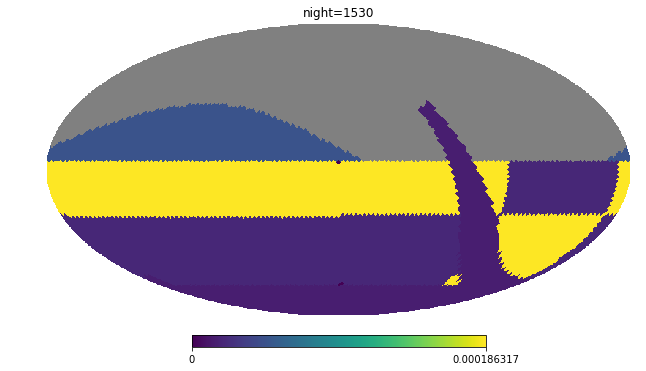

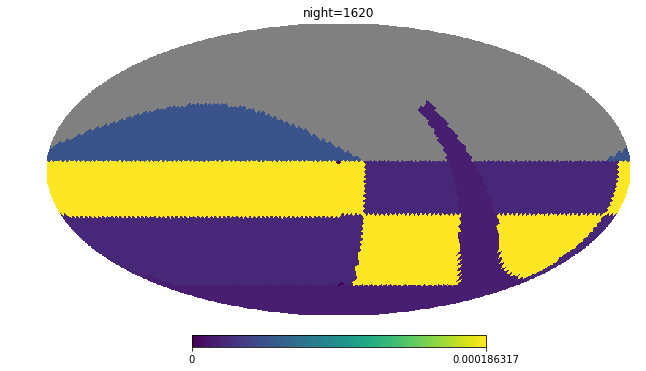

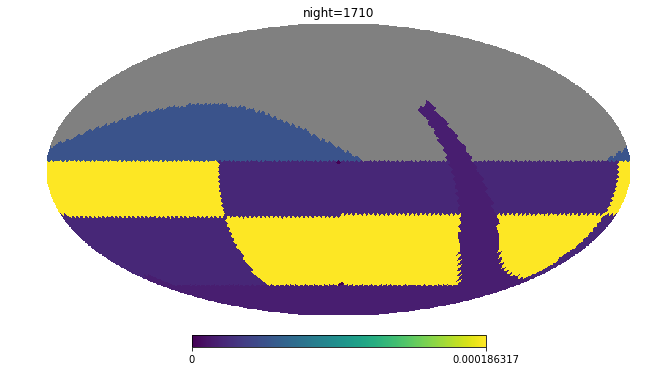

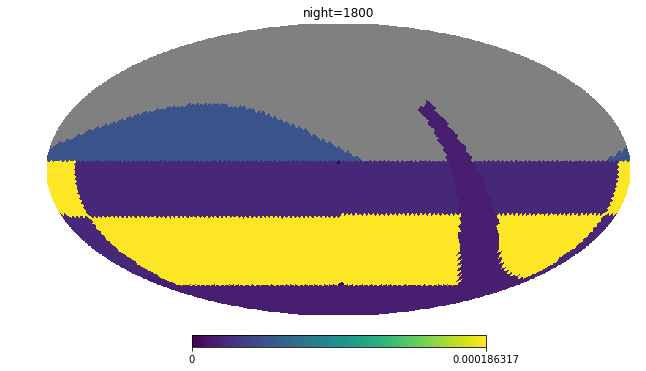

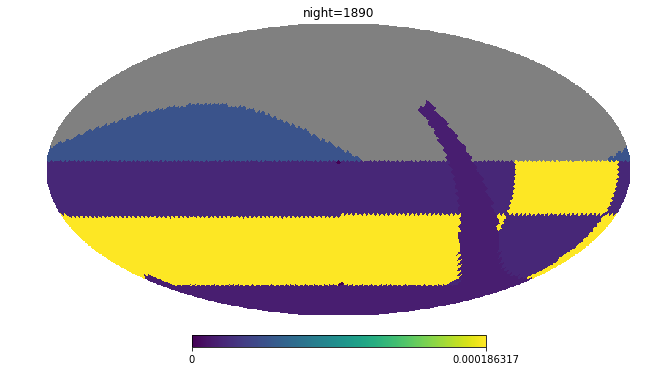

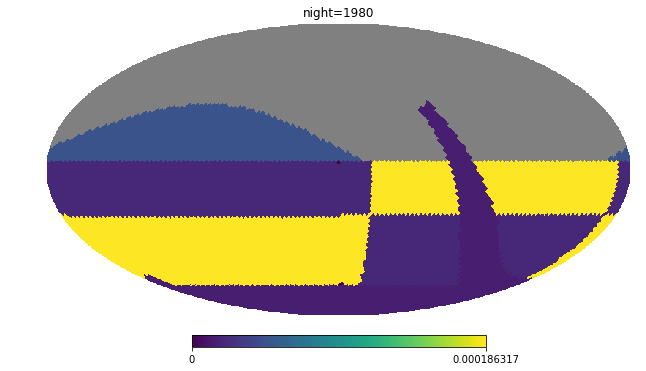

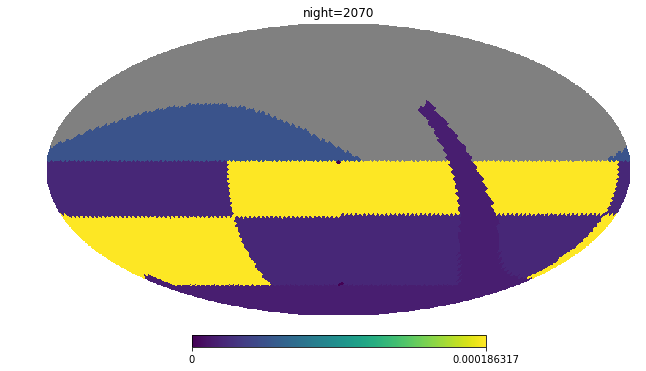

In [6]:
# Now to show what the target map basis function looks like on different nights

nights = np.arange(0,356.25*6, 30*3)
mjd0 = conditions.mjd
for day in nights:
    conditions.night = day
    hp.mollview(basis(conditions), title='night=%i' % day, min=0)